In [2]:
# Retorna jogada da rodada requerida
def get_jogada_rodada(jogadas, rodada):
    rodada = rodada + ''
    jogadaRodada = {}
    for jogada in jogadas:
        if jogada['rodada'] == rodada:
            jogadaRodada = jogada
            break
    return jogadaRodada

In [3]:
# Retorna taxa básioca de juros
def get_taxa_basica_juros(taxas, rodada):
    rodada = rodada + ''
    taxa = 0
    for t in taxas:
        if t['rodada'] == rodada:
            taxa = t['taxaJuros']
            break
    return taxa

In [4]:
# Criar JSON Cadastro Partida
def criar_json_cadastro_partida(dado):
    json_final = {
        "quantidadeRodadas": int(dado["quantidadeRodadas"]),
        "fatiaMercado": int(dado["fatiaMercado"]),
        "variavelMicroeconomica": {
            "preco": int(dado["preco"]),
            "fatorPenalidadePreco": int(dado["fatorPenalidadePreco"]),
            "propaganda": int(dado["propaganda"]),
            "porcentagemPropagandaRadio": int(dado["porcentagemPropagandaRadio"]),
            "valorMinimoPropagandaRadio": float(dado["valorMinimoPropagandaRadio"]),
            "proporcaoCrescimentoPropagandaRadio": float(dado["proporcaoCrescimentoPropagandaRadio"]),
            "porcentagemPropagandaJornal": int(dado["porcentagemPropagandaJornal"]),
            "valorMinimoPropagandaJornal": float(dado["valorMinimoPropagandaJornal"]),
            "proporcaoCrescimentoPropagandaJornal": float(dado["proporcaoCrescimentoPropagandaJornal"]),
            "porcentagemPropagandaTV": int(dado["porcentagemPropagandaTV"]),
            "valorMinimoPropagandaTV": float(dado["valorMinimoPropagandaTV"]),
            "proporcaoCrescimentoPropagandaTV": float(dado["proporcaoCrescimentoPropagandaTV"]),
            "porcentagemPropagandaInternet": int(dado["porcentagemPropagandaInternet"]),
            "valorMinimoPropagandaInternet": float(dado["valorMinimoPropagandaInternet"]),
            "proporcaoCrescimentoPropagandaInternet": float(dado["proporcaoCrescimentoPropagandaInternet"]),
            "confiabilidadeProduto1": int(dado["confiabilidadeProduto1"]),
            "confiabilidadeProduto2": int(dado["confiabilidadeProduto2"]),
            "confiabilidadeProduto3": int(dado["confiabilidadeProduto3"]),
            "capacidadeInstalada": int(dado["capacidadeInstalada"]),
            "tamanhoEstabelecimentoPequeno": int(dado["tamanhoEstabelecimentoPequeno"]),
            "pesoTamanhoEstabelecimentoPequeno": int(dado["pesoTamanhoEstabelecimentoPequeno"]),
            "qtdMaxCaixasEstabelecimentoPequeno": int(dado["qtdMaxCaixasEstabelecimentoPequeno"]),
            "tamanhoEstabelecimentoMedio": int(dado["tamanhoEstabelecimentoMedio"]),
            "pesoTamanhoEstabelecimentoMedio": int(dado["pesoTamanhoEstabelecimentoMedio"]),
            "qtdMaxCaixasEstabelecimentoMedio": int(dado["qtdMaxCaixasEstabelecimentoMedio"]),
            "tamanhoEstabelecimentoGrande": int(dado["tamanhoEstabelecimentoGrande"]),
            "pesoTamanhoEstabelecimentoGrande": int(dado["pesoTamanhoEstabelecimentoGrande"]),
            "qtdMaxCaixasEstabelecimentoGrande": int(dado["qtdMaxCaixasEstabelecimentoGrande"]),
            "pesoCaixas": int(dado["pesoCaixas"]),
            "pesoFuncionarios": int(dado["pesoFuncionarios"])
        },
        "variavelMacroeconomica": {
            "fatorAjuste": int(dado["fatorAjuste"])
        }
    }
    
    return json_final

In [5]:
# Criar JSON Registro Jogada
def criar_json_registro_jogada(jogadaRodada, identificacaoJogada):
    json_final = {
        "identificacaoJogada": str(identificacaoJogada),
        "preco": float(jogadaRodada["preco"]),
        "investimentoPropagandaRadio": float(jogadaRodada["investimentoPropagandaRadio"]),
        "investimentoPropagandaJornal": float(jogadaRodada["investimentoPropagandaJornal"]),
        "investimentoPropagandaTV": float(jogadaRodada["investimentoPropagandaTV"]),
        "investimentoPropagandaInternet": float(jogadaRodada["investimentoPropagandaInternet"]),
        "qtdProdutosEstoqueFornecedor1": int(jogadaRodada["qtdProdutosEstoqueFornecedor1"]),
        "qtdProdutosEstoqueFornecedor2": int(jogadaRodada["qtdProdutosEstoqueFornecedor2"]),
        "qtdProdutosEstoqueFornecedor3": int(jogadaRodada["qtdProdutosEstoqueFornecedor3"]),
        "tamanhoEstabelecimento": str(jogadaRodada["tamanhoEstabelecimento"]), 
        "qtdCaixas": int(jogadaRodada["qtdCaixas"]),
        "qtdFuncionarios": int(jogadaRodada["qtdFuncionarios"])
    }
    return json_final

In [6]:
# Monta JSON Registro Rodada
def criar_json_registro_rodada(identificacaoPartida, taxasBasicasJuros, jogadas):
    json_final = {
        "identificacaoPartida": str(identificacaoPartida),
        "variavelMacroeconomica": {
            "taxaJuros": float(taxasBasicasJuros) if taxasBasicasJuros is not None else None
        },
        "jogadas": jogadas
    }
    return json_final

In [7]:
import csv

# Função para ler o arquivo CSV e retornar os dados como uma lista de dicionários (JSON-like)
def csv_para_json(caminho_csv, qtd_linhas=None, como_lista=True):
    # Abrir o arquivo CSV
    with open(caminho_csv, mode='r', encoding='utf-8') as csv_file:
        # Ler o arquivo CSV usando DictReader
        csv_reader = csv.DictReader(csv_file)
        
        # Converter cada linha do CSV em um dicionário e adicionar a uma lista
        dados = []
        for i, linha in enumerate(csv_reader):
            if qtd_linhas and i >= qtd_linhas:
                break
            dados.append(linha)
    
    # Se como_lista for False e a quantidade de linhas for 1, retorna um dicionário em vez de uma lista
    if not como_lista and len(dados) == 1:
        return dados[0]
    
    return dados

In [8]:
import requests

# Função para cadastrar uma partida
def cadastrar_partida(dados):
    url = 'http://localhost:8080/api/partida/cadastrar'
    headers = {
        'Content-Type': 'application/json'
    }
    response = requests.post(url, json=dados, headers=headers)
    return response

In [9]:
import requests

# Função para registrar uma rodada
def registrar_rodada(dados):
    url = 'http://localhost:8080/api/rodada/registrarRodada'
    headers = {
        'Content-Type': 'application/json'
    }
    response = requests.post(url, json=dados, headers=headers)
    return response

In [10]:
# SE INICIA AQUI

# Define quantidade de jogadores
quantidadeJogadores = 4

# Ler o arquivo CSV para cadastrar partida
dadosCadastro = csv_para_json('cad_partida.csv', 1, False)

# Convertendo os dados do excel de cadastro para JSON de envio
dadosCadastro = criar_json_cadastro_partida(dadosCadastro)

# Fazendo cadastro da partida
dadosFinais = {}
for i in range(1, quantidadeJogadores + 1):
    dadosFinais[f'jogador{i}'] = []

responseCadPartida = cadastrar_partida(dadosCadastro)
if responseCadPartida.status_code == 200:
    print('Partida cadastrada com sucesso!')

    # Recuperando dados necessáros para cadastro de rodadas
    totalRodadas = dadosCadastro['quantidadeRodadas']
    identificacaoPartida = responseCadPartida.json()['identificacaoPartida']

    # Recuperando taxas básicas de juros
    taxasBasicasJuros = csv_para_json('taxas_basica_juros.csv')

    # Recuperando dados da rodada
    dadosRodadas = {}
    for i in range(1, quantidadeJogadores + 1):
        nomeCSV = f'jogador{i}.csv'
        dadosRodadas[f'jogador{i}'] = (csv_para_json(nomeCSV))
    
    # Fazendo cadastro das rodadas
    for i in range(1, totalRodadas + 1):
        
        dadosJogadas = []
        for j in range(1, quantidadeJogadores + 1):
            jogadaRodada = get_jogada_rodada(dadosRodadas[f'jogador{j}'], str(i))
            json_jogada = criar_json_registro_jogada(jogadaRodada, j)
            dadosJogadas.append(json_jogada)

        taxaBasicaJuros = None
        if (i - 1) % 3 == 0:
            taxaBasicaJuros = get_taxa_basica_juros(taxasBasicasJuros, str(i))
        
        json_rodada = criar_json_registro_rodada(identificacaoPartida, taxaBasicaJuros, dadosJogadas)
        
        responseRegRodada = registrar_rodada(json_rodada)

        if responseRegRodada.status_code == 200:
            print(f'Rodada {i} registrada com sucesso!')

            for jogada in responseRegRodada.json()["rodada"]["jogadas"]:
                identificacaoJogada = jogada["identificacaoJogada"]
                dadosFinais['jogador' + identificacaoJogada].append(jogada["demandaTotalJogada"])

        else:
            print(f'Erro ao registrar rodada {i}!')
            print(responseRegRodada.json()["mensagem"])
            break
        
else:
    print('Erro ao cadastrar partida!')
    print(responseCadPartida.json()["mensagem"])

print(dadosFinais)

Partida cadastrada com sucesso!
Rodada 1 registrada com sucesso!
Rodada 2 registrada com sucesso!
Rodada 3 registrada com sucesso!
Rodada 4 registrada com sucesso!
Rodada 5 registrada com sucesso!
Rodada 6 registrada com sucesso!
Rodada 7 registrada com sucesso!
Rodada 8 registrada com sucesso!
Rodada 9 registrada com sucesso!
Rodada 10 registrada com sucesso!
Rodada 11 registrada com sucesso!
Rodada 12 registrada com sucesso!
{'jogador1': [286, 333, 380, 428, 433, 523, 571, 619, 575, 590, 586, 592], 'jogador2': [257, 286, 313, 343, 371, 400, 396, 400, 486, 439, 475, 476], 'jogador3': [227, 257, 286, 313, 343, 371, 400, 429, 457, 486, 514, 543], 'jogador4': [200, 227, 257, 286, 313, 343, 371, 400, 429, 457, 486, 514]}


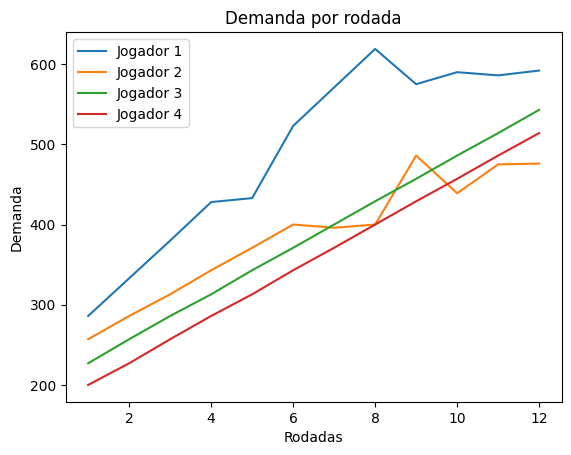

In [11]:
import matplotlib.pyplot as plt

rodadas = range(1, dadosCadastro['quantidadeRodadas'] + 1)
for i in range(1, quantidadeJogadores + 1):
    label = f'Jogador {i}'
    plt.plot(rodadas, dadosFinais[f'jogador{i}'], label=label)
    
plt.xlabel('Rodadas')
plt.ylabel('Demanda')
plt.title('Demanda por rodada')
plt.legend()
plt.show()

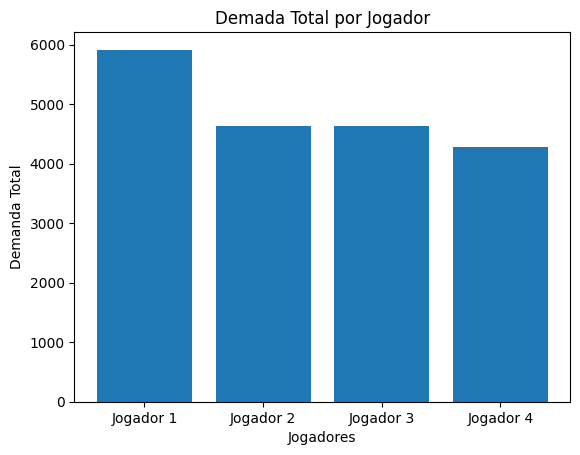

In [12]:
import matplotlib.pyplot as plt

jogadores = []
totais = []
for i in range(1, quantidadeJogadores + 1):
    jogadores.append(f'Jogador {i}')
    totais.append(sum(dadosFinais[f'jogador{i}']))

plt.bar(jogadores, totais)
plt.xlabel('Jogadores')
plt.ylabel('Demanda Total')
plt.title('Demada Total por Jogador')
plt.show()

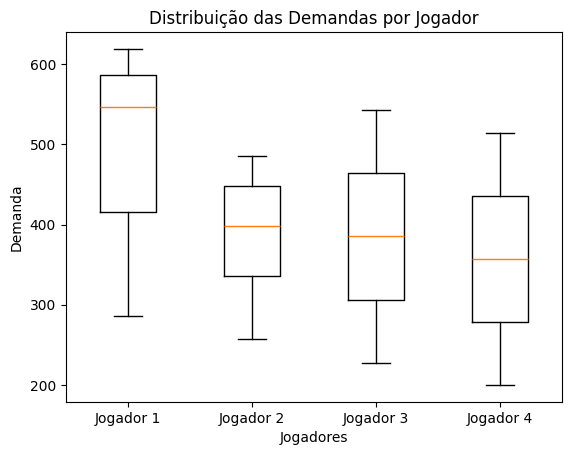

In [13]:
import matplotlib.pyplot as plt

jogadores = []
labels = []
for i in range(1, quantidadeJogadores + 1):
    jogadores.append(dadosFinais[f'jogador{i}'])
    labels.append(f'Jogador {i}')

plt.boxplot(jogadores, tick_labels=labels)
plt.xlabel('Jogadores')
plt.ylabel('Demanda')
plt.title('Distribuição das Demandas por Jogador')
plt.show()

jogador1:
  Coeficiente Angular (Slope): 29.559440559440553
  Interseção (Intercept): 300.8636363636364

jogador2:
  Coeficiente Angular (Slope): 20.24475524475524
  Interseção (Intercept): 255.24242424242425

jogador3:
  Coeficiente Angular (Slope): 28.657342657342646
  Interseção (Intercept): 199.2272727272728

jogador4:
  Coeficiente Angular (Slope): 28.632867132867123
  Interseção (Intercept): 170.8030303030304



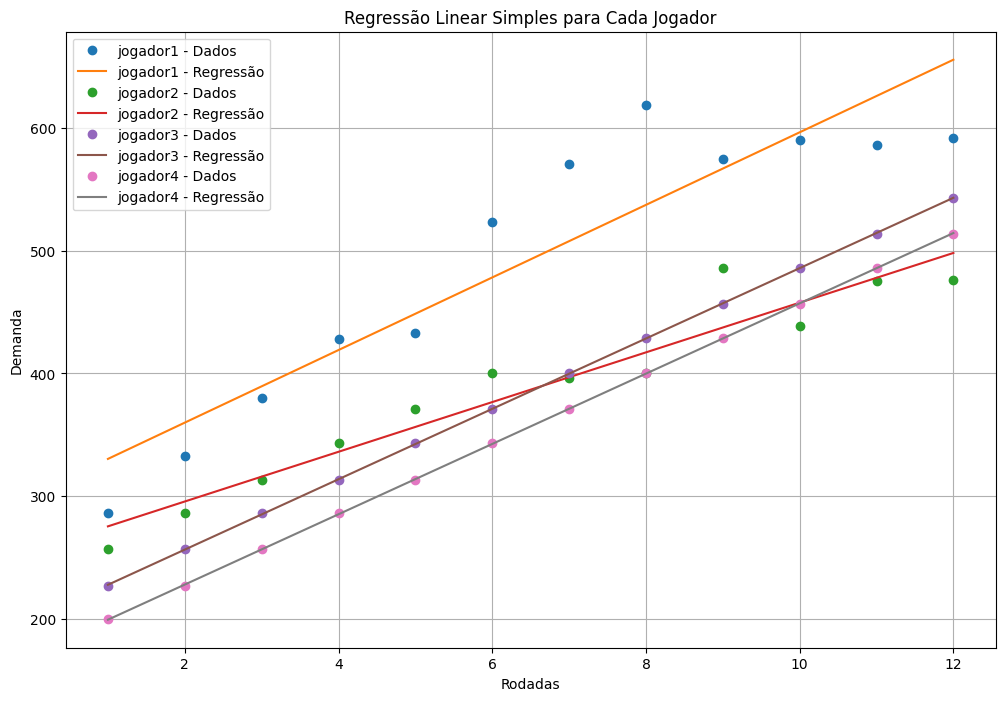

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Lista de rodadas (variável independente)
rodadas = np.arange(1, dadosCadastro['quantidadeRodadas'] + 1).reshape(-1, 1)  # Transformando em uma matriz coluna

# Criar a figura para os gráficos
plt.figure(figsize=(12, 8))

# Função para ajustar e plotar a regressão linear
def regressao_linear_simples(jogador, demandas):
    # Criar o modelo de regressão linear
    modelo = LinearRegression()
    
    # Ajustar o modelo
    modelo.fit(rodadas, demandas)
    
    # Obter o coeficiente angular e a interseção
    slope = modelo.coef_[0]
    intercept = modelo.intercept_
    
    # Predizer os valores ajustados
    pontuacoes_ajustadas = modelo.predict(rodadas)
    
    # Plotar os dados e a linha de regressão
    plt.plot(rodadas, demandas, 'o', label=f'{jogador} - Dados')  # Pontos originais
    plt.plot(rodadas, pontuacoes_ajustadas, label=f'{jogador} - Regressão')  # Linha de regressão

    # Imprimir os parâmetros da regressão
    print(f'{jogador}:')
    print(f'  Coeficiente Angular (Slope): {slope}')
    print(f'  Interseção (Intercept): {intercept}')
    print()

# Loop pelos jogadores e realizar a regressão
for jogador, demandas in dadosFinais.items():
    regressao_linear_simples(jogador, demandas)

# Configurações finais do gráfico
plt.xlabel('Rodadas')
plt.ylabel('Demanda')
plt.title('Regressão Linear Simples para Cada Jogador')
plt.legend()
plt.grid()
plt.show()